# Topic Modelling


#### Choice of Number of Topics
In this document, I am choosing the number of topics based on minimum coherence score. Apparently, it has to be maximised. However, since the difference is not huge, I'm not changing my codes. Furthermore, $C_v$ changes are not huge, only to a degree of 0.1. I'm currently using more topics than those suggested with the maximum value of $C_v$. Thus, my conclusions would not change. Finally, coherence is not to be used for choosing the number of topics and it is a heuristic anyway.

Other ways of choosing the number of topics are:
1. Interpretability: Sometimes the max coherence score might give you a very high number of topics, leading to overfitting or topics that are too fine-grained to be useful.
2. Business or Research Objectives: The ideal number of topics may also depend on the goal of your analysis. If you’re analyzing a focused dataset, fewer topics might make more sense.

#### Dataset
Dataset is financial complaints. I've also put it here.

Details: https://github.com/harshvardhaniimi/bzan-557/tree/main/guest%20lecture%202

In [1]:
# Loading Dataset
import numpy as np
import pandas as pd
import imp # python's import helper
df = pd.read_csv("/Users/harshvardhan/Documents/UTK/Classes/Spring 2022/BZAN 557 671 Text Mining/Project/Complaints/complaints_processed.csv")
df

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162410,162410,credit_reporting,zales comenity bank closed sold account report...
162411,162411,retail_banking,zelle suspended account without cause banking ...
162412,162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


In [2]:
df.dtypes

Unnamed: 0     int64
product       object
narrative     object
dtype: object

In [3]:
df["product"].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

In [4]:
df["product"] = df["product"].values.astype("U").tolist()
df["narrative"] = df["narrative"].values.astype("U").tolist()

# Texts for Each Category
`'credit_card', 'retail_banking', 'credit_reporting', 'mortgages_and_loans', 'debt_collection'`

In [6]:
all_texts = df["narrative"]
all_texts

0         purchase order day shipping amount receive pro...
1         forwarded message date tue subject please inve...
2         forwarded message cc sent friday pdt subject f...
3         payment history missing credit report speciali...
4         payment history missing credit report made mis...
                                ...                        
162410    zales comenity bank closed sold account report...
162411    zelle suspended account without cause banking ...
162412    zero contact made debt supposedly resolved fou...
162413    zillow home loan nmls nmls actual quote provid...
162414    zuntafi sent notice willing settle defaulted s...
Name: narrative, Length: 162415, dtype: object

In [7]:
cc_texts = all_texts[df["product"] == "credit_card"].tolist()
rb_texts = all_texts[df["product"] == "retail_banking"].tolist()
cr_texts = all_texts[df["product"] == "credit_reporting"].tolist()
ml_texts = all_texts[df["product"] == "mortgages_and_loans"].tolist()
dc_texts = all_texts[df["product"] == "debt_collection"].tolist()

# Function for Topic Modelling

Since I have to run the same set of codes multiple times to obtain the topics, I will write a function that finds the topics for the text list entered.

In [8]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [9]:
def topic_modeller(texts, start = 5, end = 50, step = 5):
    train = [i.split() for i in texts]
    common_dictionary = Dictionary(train)
    common_corpus = [common_dictionary.doc2bow(t) for t in train]
    coherence_values = []
    model_list = []
    for num_topics in range(start, end, step):
        model = gensim.models.ldamodel.LdaModel(
            corpus=common_corpus, num_topics=num_topics, id2word=common_dictionary
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=train, dictionary=common_dictionary, coherence='c_v'
        )
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#### Trying Function on Small Scale

In [40]:
ttttt = all_texts[0:10000]

In [41]:
# run and save
model_list, coherence_values = topic_modeller(ttttt, start = 2, end = 5, step = 1)

In [44]:
coherence_values

[0.561594323978825, 0.4844133751488154, 0.5993553589014797]

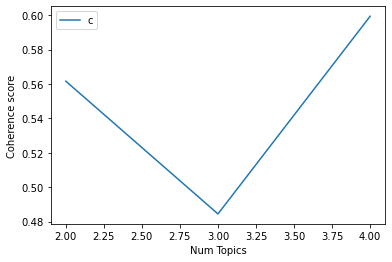

Num Topics = 2  is having Coherence Value of 0.5616
Num Topics = 3  is having Coherence Value of 0.4844
Num Topics = 4  is having Coherence Value of 0.5994


In [45]:
# make plot
import matplotlib.pyplot as plt

end=5; start=2; step=1;
x = range(start, end, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

In [10]:
# Function for Coherence Plot
def coherence_plot(start, end, step, path):
    x = range(start, end, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.savefig(path)
    plt.show()

    for m, cv in zip(x, coherence_values):
        print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

The code works! Let's apply it for the first group and interpret the results.

# Topics in Credit Card Complaints

In [49]:
model_list, coherence_values = topic_modeller(cc_texts, start = 10, end = 50, step = 2)

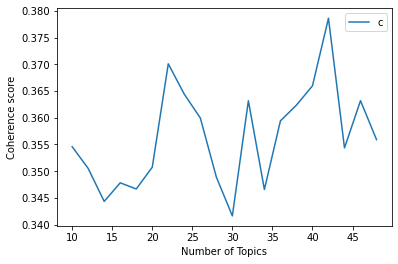

Num Topics = 10  is having Coherence Value of 0.3546
Num Topics = 12  is having Coherence Value of 0.3505
Num Topics = 14  is having Coherence Value of 0.3443
Num Topics = 16  is having Coherence Value of 0.3478
Num Topics = 18  is having Coherence Value of 0.3467
Num Topics = 20  is having Coherence Value of 0.3507
Num Topics = 22  is having Coherence Value of 0.3701
Num Topics = 24  is having Coherence Value of 0.3644
Num Topics = 26  is having Coherence Value of 0.36
Num Topics = 28  is having Coherence Value of 0.3489
Num Topics = 30  is having Coherence Value of 0.3416
Num Topics = 32  is having Coherence Value of 0.3632
Num Topics = 34  is having Coherence Value of 0.3466
Num Topics = 36  is having Coherence Value of 0.3594
Num Topics = 38  is having Coherence Value of 0.3624
Num Topics = 40  is having Coherence Value of 0.366
Num Topics = 42  is having Coherence Value of 0.3786
Num Topics = 44  is having Coherence Value of 0.3544
Num Topics = 46  is having Coherence Value of 0.3

In [55]:
coherence_plot(start = 10, end = 50, step = 2, path = "/Users/harshvardhan/Documents/UTK/Classes/Spring 2022/Text Mining BZAN 557 671/Project/Complaints/Plots/coherence-credit-card.pdf")

The best choice is 42 topics.

In [15]:
model_list, coherence_values = topic_modeller(cc_texts, start = 30, end = 31, step = 1)

In [16]:
model_list

In [18]:
cctopics = model_list[0]
cctopics.show_topics(formatted=False)

[(25,
  [('fee', 0.09860279),
   ('late', 0.05273563),
   ('payment', 0.039695494),
   ('paid', 0.02149763),
   ('due', 0.02070193),
   ('pay', 0.020003544),
   ('charged', 0.017750286),
   ('card', 0.017639559),
   ('credit', 0.015677193),
   ('bill', 0.014165336)]),
 (22,
  [('card', 0.050779756),
   ('credit', 0.027533391),
   ('time', 0.01206509),
   ('would', 0.011329668),
   ('charge', 0.0076464834),
   ('called', 0.0069253314),
   ('never', 0.006364491),
   ('get', 0.0063528554),
   ('back', 0.006226389),
   ('new', 0.0058062845)]),
 (26,
  [('dispute', 0.034713157),
   ('refund', 0.025204845),
   ('chase', 0.018039562),
   ('merchant', 0.01637681),
   ('credit', 0.016164282),
   ('received', 0.01542731),
   ('charge', 0.01327836),
   ('letter', 0.012914498),
   ('flight', 0.010110105),
   ('back', 0.009336137)]),
 (14,
  [('synchrony', 0.13580094),
   ('amazon', 0.04351805),
   ('room', 0.025527513),
   ('card', 0.015219135),
   ('issue', 0.014089429),
   ('store', 0.013667659)

# Topics in Retail Baning

In [11]:
model_list, coherence_values = topic_modeller(rb_texts, start = 10, end = 50, step = 2)

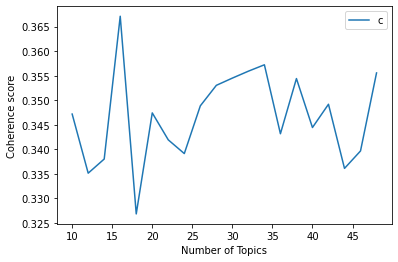

Num Topics = 10  is having Coherence Value of 0.3472
Num Topics = 12  is having Coherence Value of 0.3352
Num Topics = 14  is having Coherence Value of 0.338
Num Topics = 16  is having Coherence Value of 0.3671
Num Topics = 18  is having Coherence Value of 0.3269
Num Topics = 20  is having Coherence Value of 0.3474
Num Topics = 22  is having Coherence Value of 0.3419
Num Topics = 24  is having Coherence Value of 0.3391
Num Topics = 26  is having Coherence Value of 0.3489
Num Topics = 28  is having Coherence Value of 0.353
Num Topics = 30  is having Coherence Value of 0.3545
Num Topics = 32  is having Coherence Value of 0.3559
Num Topics = 34  is having Coherence Value of 0.3572
Num Topics = 36  is having Coherence Value of 0.3432
Num Topics = 38  is having Coherence Value of 0.3544
Num Topics = 40  is having Coherence Value of 0.3445
Num Topics = 42  is having Coherence Value of 0.3492
Num Topics = 44  is having Coherence Value of 0.3361
Num Topics = 46  is having Coherence Value of 0.

In [14]:
coherence_plot(start = 10, end = 50, step = 2, 
    path = "/Users/harshvardhan/Documents/UTK/Classes/Spring 2022/Text Mining BZAN 557 671/Project/Complaints/Plots/coherence-retail-banking.pdf")

In [19]:
model_list, coherence_values = topic_modeller(cc_texts, start = 18, end = 19, step = 2)

In [23]:
rbtopics = model_list[0]
rbtopics.show_topics(formatted=True)

[(4,
  '0.047*"chase" + 0.030*"card" + 0.020*"credit" + 0.014*"item" + 0.012*"transaction" + 0.012*"received" + 0.012*"purchase" + 0.011*"store" + 0.010*"account" + 0.009*"synchrony"'),
 (6,
  '0.073*"payment" + 0.039*"account" + 0.029*"credit" + 0.023*"late" + 0.013*"card" + 0.013*"due" + 0.012*"made" + 0.011*"time" + 0.011*"would" + 0.010*"bank"'),
 (2,
  '0.031*"bank" + 0.025*"america" + 0.020*"claim" + 0.017*"money" + 0.013*"card" + 0.011*"told" + 0.010*"call" + 0.010*"back" + 0.009*"even" + 0.009*"get"'),
 (14,
  '0.070*"account" + 0.049*"credit" + 0.026*"report" + 0.019*"reported" + 0.018*"company" + 0.016*"reporting" + 0.014*"information" + 0.012*"never" + 0.011*"opened" + 0.011*"bureau"'),
 (16,
  '0.038*"credit" + 0.032*"citibank" + 0.024*"citi" + 0.022*"card" + 0.021*"charge" + 0.016*"received" + 0.015*"account" + 0.015*"letter" + 0.009*"would" + 0.008*"dispute"'),
 (11,
  '0.155*"one" + 0.133*"capital" + 0.039*"credit" + 0.038*"card" + 0.014*"account" + 0.006*"time" + 0.006*

# Topics in Credit Reporting

In [11]:
model_list, coherence_values = topic_modeller(cr_texts, start = 10, end = 50, step = 2)

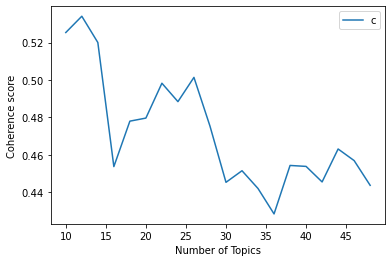

Num Topics = 10  is having Coherence Value of 0.5254
Num Topics = 12  is having Coherence Value of 0.5341
Num Topics = 14  is having Coherence Value of 0.52
Num Topics = 16  is having Coherence Value of 0.4536
Num Topics = 18  is having Coherence Value of 0.478
Num Topics = 20  is having Coherence Value of 0.4796
Num Topics = 22  is having Coherence Value of 0.4982
Num Topics = 24  is having Coherence Value of 0.4884
Num Topics = 26  is having Coherence Value of 0.5014
Num Topics = 28  is having Coherence Value of 0.4753
Num Topics = 30  is having Coherence Value of 0.4452
Num Topics = 32  is having Coherence Value of 0.4514
Num Topics = 34  is having Coherence Value of 0.4419
Num Topics = 36  is having Coherence Value of 0.4283
Num Topics = 38  is having Coherence Value of 0.4543
Num Topics = 40  is having Coherence Value of 0.4538
Num Topics = 42  is having Coherence Value of 0.4454
Num Topics = 44  is having Coherence Value of 0.4631
Num Topics = 46  is having Coherence Value of 0.4

In [12]:
coherence_plot(start = 10, end = 50, step = 2, 
    path = "/Users/harshvardhan/Documents/UTK/Classes/Spring 2022/BZAN 557 671 Text Mining/Project/Complaints/Plots/coherence-credit-reporting.pdf")

In [13]:
# 36 topics
model_list, coherence_values = topic_modeller(cr_texts, start = 36, end = 37, step = 1)

In [15]:
crtopics = model_list[0]
crtopics.show_topics(formatted=True)

[(22,
  '0.034*"formal" + 0.031*"complaint" + 0.030*"credit" + 0.029*"reporting" + 0.027*"fair" + 0.026*"violation" + 0.026*"act" + 0.023*"request" + 0.022*"investigation" + 0.018*"equifax"'),
 (3,
  '0.188*"balance" + 0.175*"date" + 0.062*"creditor" + 0.042*"closed" + 0.036*"status" + 0.031*"original" + 0.026*"amount" + 0.026*"last" + 0.018*"negative" + 0.017*"potentially"'),
 (23,
  '0.137*"loan" + 0.037*"student" + 0.023*"union" + 0.022*"credit" + 0.017*"trans" + 0.017*"settlement" + 0.013*"settled" + 0.013*"year" + 0.012*"education" + 0.011*"child"'),
 (24,
  '0.127*"debt" + 0.084*"collection" + 0.027*"account" + 0.021*"agency" + 0.020*"sec" + 0.019*"company" + 0.018*"validation" + 0.017*"occur" + 0.015*"creditor" + 0.013*"validate"'),
 (32,
  '0.085*"security" + 0.081*"social" + 0.051*"report" + 0.041*"credit" + 0.031*"name" + 0.030*"someone" + 0.029*"dob" + 0.028*"stolen" + 0.024*"identity" + 0.023*"number"'),
 (18,
  '0.041*"credit" + 0.029*"payment" + 0.022*"loan" + 0.019*"bure

# Topics in Mortgages and Loans

In [16]:
model_list, coherence_values = topic_modeller(ml_texts, start = 10, end = 50, step = 2)

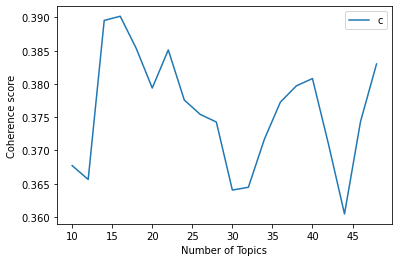

Num Topics = 10  is having Coherence Value of 0.3677
Num Topics = 12  is having Coherence Value of 0.3656
Num Topics = 14  is having Coherence Value of 0.3896
Num Topics = 16  is having Coherence Value of 0.3902
Num Topics = 18  is having Coherence Value of 0.3853
Num Topics = 20  is having Coherence Value of 0.3794
Num Topics = 22  is having Coherence Value of 0.3851
Num Topics = 24  is having Coherence Value of 0.3776
Num Topics = 26  is having Coherence Value of 0.3754
Num Topics = 28  is having Coherence Value of 0.3743
Num Topics = 30  is having Coherence Value of 0.364
Num Topics = 32  is having Coherence Value of 0.3645
Num Topics = 34  is having Coherence Value of 0.3717
Num Topics = 36  is having Coherence Value of 0.3773
Num Topics = 38  is having Coherence Value of 0.3797
Num Topics = 40  is having Coherence Value of 0.3808
Num Topics = 42  is having Coherence Value of 0.3709
Num Topics = 44  is having Coherence Value of 0.3604
Num Topics = 46  is having Coherence Value of 0

In [18]:
coherence_plot(start = 10, end = 50, step = 2, 
    path = "/Users/harshvardhan/Documents/UTK/Classes/Spring 2022/BZAN 557 671 Text Mining/Project/Complaints/Plots/coherence-mortgages-and-loans.pdf")

In [27]:
# I will choose thirty topics.
model_list, coherence_values = topic_modeller(ml_texts, start = 30, end = 31, step = 1)


In [31]:
mltopics = model_list[0]
mltopics.show_topics(formatted=True)

[(22,
  '0.097*"credit" + 0.023*"loan" + 0.023*"score" + 0.016*"report" + 0.011*"company" + 0.010*"income" + 0.010*"card" + 0.009*"union" + 0.009*"inquiry" + 0.008*"navy"'),
 (15,
  '0.075*"payment" + 0.026*"balance" + 0.025*"interest" + 0.021*"loan" + 0.020*"fee" + 0.019*"amount" + 0.018*"principal" + 0.017*"account" + 0.015*"paid" + 0.013*"bank"'),
 (24,
  '0.027*"account" + 0.016*"information" + 0.015*"loan" + 0.012*"debt" + 0.011*"violation" + 0.011*"consumer" + 0.011*"complaint" + 0.011*"company" + 0.010*"proof" + 0.010*"letter"'),
 (5,
  '0.059*"u" + 0.042*"chase" + 0.025*"bank" + 0.018*"would" + 0.015*"told" + 0.013*"flagstar" + 0.013*"mortgage" + 0.011*"said" + 0.011*"call" + 0.010*"letter"'),
 (1,
  '0.060*"payment" + 0.052*"escrow" + 0.037*"loan" + 0.027*"mortgage" + 0.022*"monthly" + 0.021*"month" + 0.019*"amount" + 0.014*"servicing" + 0.012*"paid" + 0.012*"year"'),
 (7,
  '0.058*"insurance" + 0.027*"mortgage" + 0.020*"escrow" + 0.018*"received" + 0.018*"policy" + 0.017*"com

# Topics in Debt Collection

In [24]:
model_list, coherence_values = topic_modeller(dc_texts, start = 10, end = 50, step = 2)

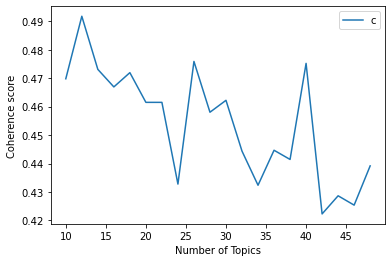

Num Topics = 10  is having Coherence Value of 0.4698
Num Topics = 12  is having Coherence Value of 0.4918
Num Topics = 14  is having Coherence Value of 0.4731
Num Topics = 16  is having Coherence Value of 0.4669
Num Topics = 18  is having Coherence Value of 0.4719
Num Topics = 20  is having Coherence Value of 0.4615
Num Topics = 22  is having Coherence Value of 0.4615
Num Topics = 24  is having Coherence Value of 0.4328
Num Topics = 26  is having Coherence Value of 0.4759
Num Topics = 28  is having Coherence Value of 0.458
Num Topics = 30  is having Coherence Value of 0.4622
Num Topics = 32  is having Coherence Value of 0.4444
Num Topics = 34  is having Coherence Value of 0.4324
Num Topics = 36  is having Coherence Value of 0.4447
Num Topics = 38  is having Coherence Value of 0.4414
Num Topics = 40  is having Coherence Value of 0.4752
Num Topics = 42  is having Coherence Value of 0.4223
Num Topics = 44  is having Coherence Value of 0.4287
Num Topics = 46  is having Coherence Value of 0

In [26]:
coherence_plot(start = 10, end = 50, step = 2, 
    path = "/Users/harshvardhan/Documents/UTK/Classes/Spring 2022/BZAN 557 671 Text Mining/Project/Complaints/Plots/coherence-debt-collection.pdf")

In [32]:
# calculate best model again here
model_list, coherence_values = topic_modeller(dc_texts, start = 42, end = 43, step = 1)

In [39]:
dctopics = model_list[0]
dctopics.show_topics(formatted=True)

[(40,
  '0.077*"pra" + 0.070*"debt" + 0.057*"system" + 0.023*"management" + 0.021*"credit" + 0.018*"notification" + 0.017*"ic" + 0.015*"received" + 0.014*"resource" + 0.014*"complaint"'),
 (15,
  '0.029*"court" + 0.011*"would" + 0.011*"case" + 0.010*"time" + 0.009*"pay" + 0.008*"attorney" + 0.007*"debt" + 0.007*"legal" + 0.006*"work" + 0.006*"judgement"'),
 (28,
  '0.077*"debt" + 0.075*"act" + 0.062*"fair" + 0.037*"collection" + 0.029*"practice" + 0.023*"section" + 0.020*"reporting" + 0.016*"violation" + 0.014*"right" + 0.014*"federal"'),
 (12,
  '0.031*"debt" + 0.024*"number" + 0.016*"contact" + 0.013*"information" + 0.013*"phone" + 0.012*"social" + 0.012*"company" + 0.012*"account" + 0.012*"name" + 0.010*"address"'),
 (17,
  '0.040*"credit" + 0.040*"bill" + 0.038*"insurance" + 0.036*"collection" + 0.019*"service" + 0.017*"report" + 0.014*"agency" + 0.012*"company" + 0.012*"billing" + 0.012*"medical"'),
 (31,
  '0.033*"payment" + 0.030*"attorney" + 0.022*"child" + 0.016*"made" + 0.015